In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# import resources
main_df = pd.read_csv("Resources/Cleaned Data.csv")
ad_tag_view_counts_df = pd.read_csv("Resources/ad_tag_view_counts.csv")
ad_tag_counts_df = pd.read_csv("Resources/ad_tag_counts.csv")

# Bar Charts

The most common ads to be made in 2000-2020 was funny ads and ads that showed the product quickly. The same can be said for the ads that were viewed the most. This makes sense because if there are more types of one ad made, then it would be logical to believe that it would have more views. It was a surprise for us to see that ads that showed the product quickly had the most views by type.

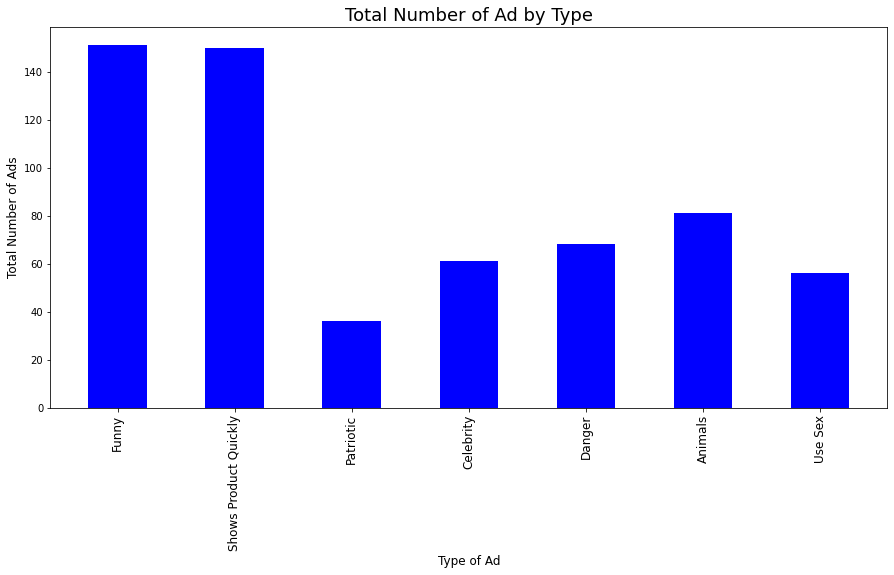

In [3]:
# create one bar chart to get the total number of ads by type
plt.figure(figsize=(15,7))
plt.bar(ad_tag_counts_df.keys(), ad_tag_counts_df.iloc[0, :] , color="blue", align="center", width=0.5)
plt.xticks([value for value in ad_tag_counts_df.keys()], rotation ="vertical", fontsize=12)
plt.title("Total Number of Ad by Type", fontsize=18)
plt.xlabel("Type of Ad", fontsize=12)
plt.ylabel("Total Number of Ads", fontsize=12)
plt.show()

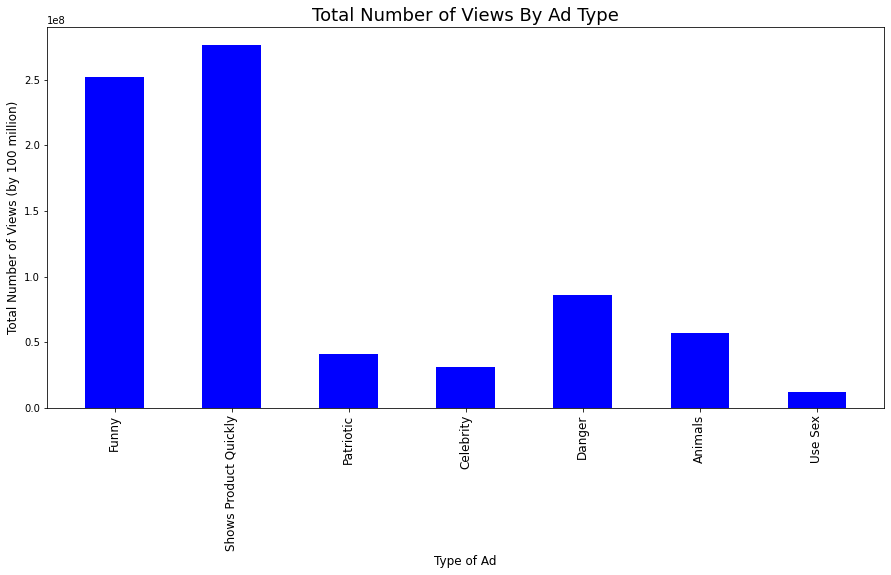

In [4]:
# create one bar chart to get the total number of views by ads type
plt.figure(figsize=(15,7))
plt.bar(ad_tag_view_counts_df.keys(), ad_tag_view_counts_df.iloc[0, :] , color="blue", align="center", width=0.5)
plt.xticks([value for value in ad_tag_view_counts_df.keys()], rotation ="vertical", fontsize=12)
plt.title("Total Number of Views By Ad Type", fontsize=18)
plt.xlabel("Type of Ad", fontsize=12)
plt.ylabel("Total Number of Views (by 100 million)", fontsize=12)
plt.show()

# Pie Charts

From the pie charts we can see that almost 70% of the ads had the tag of funny. The funny ads also had over 70% of the total views. This would make sense because if one type was made more often it would make sense if it also had the most views.


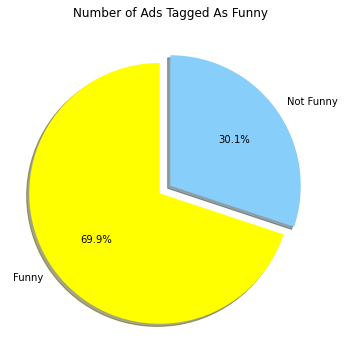

In [5]:
# count of funny vs not funny by type

# funny
funny_ads=len(main_df.loc[main_df["Funny"] == True])

# not funny
not_funny_ads=len(main_df.loc[main_df["Funny"] == False])

# Pie chart showing funny vs not funny by type
plt.figure(figsize=(15, 6))

# Labels for each slice of the pie chart
labels = ["Funny", "Not Funny"]

# Values representing the number of funny and not funny ad videos
sizes = [funny_ads, not_funny_ads]

# colors for each slice of the pie chart
colors = ["yellow", "lightskyblue"]

# funny separated from not funny
explode = [0.1, 0]

# create pie chart from values
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Number of Ads Tagged As Funny")
plt.show()

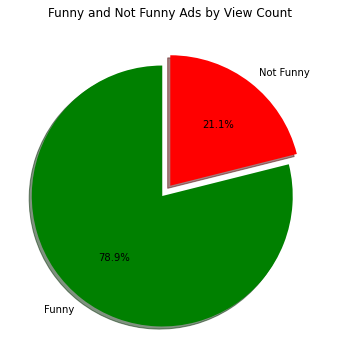

In [6]:
# count of views by funny and not funny ads
funny_views=main_df.loc[main_df["Funny"] == True] ["View Counts"].sum()
not_funny_views=main_df.loc[main_df["Funny"] == False] ["View Counts"].sum()

# pie chart of funny vs not funny by viewcount
plt.figure(figsize=(15,6))

# Labels for each slice of the pie chart
labels = ["Funny", "Not Funny"]

# Values representing the viewcounts of funny and not funny ad videos
sizes = [funny_views, not_funny_views]

# colors for each slice of the pie chart
colors = ["green", "red"]

# funny separated from not funny
explode = [0.1, 0]

# create pie chart from values
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Funny and Not Funny Ads by View Count")
plt.show()

# Hypothesis Test

###### Hypothesis
Ads that contain the tag 'Funny' would receive more views on YouTube.

###### Null Hypothesis
There is no statistically significant difference in view counts between ads that contain the 'Funny' tag and those that do not contain the 'Funny' tag.

###### Results
Because the calculated P-Value is exactly zero, we reject the null hypothesis.

In [7]:
# extract the relevant data from the main DataFrame
funnySeries = main_df.loc[main_df["Funny"] == True, :]["View Counts"]
unfunnySeries = main_df.loc[main_df["Funny"] == False, :]["View Counts"]

In [8]:
# construct the hypothesis test series
obsSeries = pd.Series(data = [sum(funnySeries), sum(unfunnySeries)], name = "observed")
expSeries = pd.Series(data = [sum(obsSeries) / 2, sum(obsSeries) / 2], name = "expected")

In [9]:
# perform a Chi-Squared test because this is comparing categorical data
pValue = st.chisquare(obsSeries, expSeries)[1]

# display the p-value
print(f"P-Value = {pValue:,.4f}")

P-Value = 0.0000


### Batch Hypothesis Tests

In [10]:
# construct list of ad categories
categories = ["Funny", "Shows Product Quickly", "Celebrity", "Danger", "Animals", "Use Sex"]

# declare the p-value lists
chi_square_pvalues = []
student_ttest_pvalues = []
mannwhitneyu_pvalues = []
kruskal_pvalues = []

# declare the summary statistics lists
maxTrue_list = []
minTrue_list = []
sumTrue_list = []
meanTrue_list = []
medianTrue_list = []
maxFalse_list = []
minFalse_list = []
sumFalse_list = []
meanFalse_list = []
medianFalse_list = []

# iterate through the ad categories
for category in categories:
    
    # extract the series
    whenTrue = main_df.loc[main_df[category] == True, :]["View Counts"]
    whenFalse = main_df.loc[main_df[category] == False, :]["View Counts"]
    
    # construct the Chi Square observed series
    observed = pd.Series(data = [sum(whenTrue), sum(whenFalse)], name = "observed")
    expected = pd.Series(data = [sum(observed) / 2, sum(observed) / 2], name = "expected")
    
    # calculate the P-Value with a Chi Square Test
    chi_square_pvalues.append(st.chisquare(observed, expected)[1])
    
    # calculate the P-Value with a Student T-Test
    student_ttest_pvalues.append(st.ttest_ind(whenFalse, whenTrue)[1])
    
    # calculate the P-Value with a Mann-Whitney U Test
    mannwhitneyu_pvalues.append(st.mannwhitneyu(whenTrue, whenFalse, alternative = "less")[1])
    
    # calculate the P-Value with a Kruskal-Wallis Test
    kruskal_pvalues.append(st.kruskal(whenTrue, whenFalse)[1])
    
    # calculate the summary statistics
    maxTrue_list.append(max(whenTrue))
    minTrue_list.append(min(whenTrue))
    sumTrue_list.append(sum(whenTrue))
    meanTrue_list.append(whenTrue.mean())
    medianTrue_list.append(whenTrue.median())
    maxFalse_list.append(max(whenFalse))
    minFalse_list.append(min(whenFalse))
    sumFalse_list.append(sum(whenFalse))
    meanFalse_list.append(whenFalse.mean())
    medianFalse_list.append(whenFalse.median())

In [11]:
# create a DataFrame from the results then transpose it
pvalues_df = pd.DataFrame({
                    "Tag": categories,
                    "Chi Square": [f"{member:,.4f}" for member in chi_square_pvalues],
                    "Student T-Test": [f"{member:,.4f}" for member in student_ttest_pvalues],
                    "Mann-Whitney U": [f"{member:,.4f}" for member in mannwhitneyu_pvalues],
                    "Kruskal-Wallis": [f"{member:,.4f}" for member in kruskal_pvalues],
                    "Max (True)": [f"{member:,.0f}" for member in maxTrue_list],
                    "Max (False)": [f"{member:,.0f}" for member in maxFalse_list],
                    "Min (True)": [f"{member:,.0f}" for member in minTrue_list],
                    "Min (False)": [f"{member:,.0f}" for member in minFalse_list],
                    "Sum (True)": [f"{member:,.0f}" for member in sumTrue_list],
                    "Sum (False)": [f"{member:,.0f}" for member in sumFalse_list],
                    "Mean (True)": [f"{member:,.0f}" for member in meanTrue_list],
                    "Mean (False)": [f"{member:,.0f}" for member in meanFalse_list],
                    "Median (True)": [f"{member:,.0f}" for member in medianTrue_list],
                    "Median (False)": [f"{member:,.0f}" for member in medianFalse_list]}).T

# set the column headers to the tags
pvalues_df.columns = pvalues_df.iloc[0, :]

# remove the tags row
pvalues_df = pvalues_df.iloc[1:, :]

# display the DataFrame
print("P-Values & Statistics for View Counts")
pvalues_df

P-Values & Statistics for View Counts


Tag,Funny,Shows Product Quickly,Celebrity,Danger,Animals,Use Sex
Chi Square,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Student T-Test,0.7430,0.5356,0.4900,0.8672,0.4985,0.3964
Mann-Whitney U,0.7255,0.7899,0.4385,0.8396,0.5736,0.1960
Kruskal-Wallis,0.5497,0.4210,0.8760,0.3214,0.8537,0.3914
Max (True),"186,420,302","186,420,302","15,247,385","28,800,689","24,399,414","2,429,282"
Max (False),"28,800,689","28,800,689","186,420,302","186,420,302","186,420,302","186,420,302"
Min (True),41,41,173,657,41,271
Min (False),41,41,41,41,41,41
Sum (True),"252,002,538","276,308,725","30,786,314","85,680,972","57,116,939","11,778,047"
Sum (False),"67,339,326","43,033,139","288,555,550","233,660,892","262,224,925","307,563,817"


### Adjustment to Hypothesis Testing
After conversations with Dominic LaBella and Colin Barquist we found that our original hypothesis test and subsequent batch tests were established on incorrect assumptions. The results from those tests should not be taken at face value. The sheer difference in volume of videos tagged as 'x' vs 'y' caused such a vast difference in the View Counts that a realistic analysis was improbable. To fix this we take a random sampling from each subset so we're comparing series of equal sizes then run a Chi Square test on the resulting series. This is repeated multiple times to account for the random sampling.

Because the results consistently show P-Values above the 0.05 threshold we fail to reject the null hypothesis.

In [12]:
# calculate the View Counts quartiles and IQR
quartiles = main_df["View Counts"].quantile([0.25, 0.50, 0.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
IQR = upper - lower

# calculate the boundaries
lBound = lower - (1.5 * IQR)
uBound = upper + (1.5 * IQR)

# remove potential outliers from the View Counts
vcFiltered_df = main_df.loc[(main_df["View Counts"] >= lBound) & (main_df["View Counts"] <= uBound)]

In [13]:
# set the analysis iteration count
analysisCount = 10

# set the minimum allowed iterations
minAllowed = 20

# set the iteration's fraction of source
itrFraction = 0.30

# calculate the row count of the resulting DataFrame
rowCount = analysisCount + 5

# create the resulting DataFrame
stats_df = pd.DataFrame({"Iteration": [value for value in range(rowCount)]})

# change the last 'Iteration' entry
stats_df.iloc[len(stats_df) - 5, 0] = "Max"
stats_df.iloc[len(stats_df) - 4, 0] = "Min"
stats_df.iloc[len(stats_df) - 3, 0] = "Mean"
stats_df.iloc[len(stats_df) - 2, 0] = "Median"
stats_df.iloc[len(stats_df) - 1, 0] = "StDev"

# iterate through the analysis x times
for category in categories:
    
    # filter the DataFrame to True/False
    whenTrue_df = vcFiltered_df.loc[vcFiltered_df[category] == True, :]
    whenFalse_df = vcFiltered_df.loc[vcFiltered_df[category] == False, :]
    
    # calculate the number of iterations
    itrCount = 0
    if len(whenTrue_df) <= len(whenFalse_df):
        itrCount = len(whenTrue_df) - int(itrFraction * len(whenTrue_df))
    else:
        itrCount = len(whenFalse_df) - int(itrFraction * len(whenFalse_df))
    
    # initialize the data list
    column = []
    
    # ensure the iteration count isn't too small
    if itrCount >= minAllowed:
    
        # iterate through the defined categories
        for i in range(analysisCount):
            
            # initialize the bins
            tBin = 0
            fBin = 0
            
            # assemble the bins
            for j in range(itrCount):
                
                # extract the associated view counts
                tValue = whenTrue_df.sample()["View Counts"].tolist()[0]
                fValue = whenFalse_df.sample()["View Counts"].tolist()[0]

                # increment the corresponding bin
                if tValue > fValue:
                    tBin += 1
                elif tValue < fValue:
                    fBin += 1
            
            # calculate the expected bin
            eBin = (tBin + fBin) / 2
            
            # construct the Chi Square series
            observed = pd.Series(data = [tBin, fBin], name = "Observed")
            expected = pd.Series(data = [eBin, eBin], name = "Expected")
            
            # calculate the Chi Square p-value
            column.append(st.chisquare(observed, expected)[1])
        
        # calculate stats
        maxValue = max(column)
        minValue = min(column)
        meanValue = np.mean(column)
        medianValue = np.median(column)
        stDevValue = np.std(column)
        
        # add a row for p-value stats
        column.append(maxValue)
        column.append(minValue)
        column.append(meanValue)
        column.append(medianValue)
        column.append(stDevValue)
        
        # add the data list to the DataFrame
        stats_df[category] = [f"{value:,.3f}" for value in column]

stats_df.style.hide(axis = "index")

Iteration,Funny,Shows Product Quickly,Celebrity,Danger,Animals,Use Sex
0,0.527,1.000,0.622,0.217,0.773,1.000
1,0.206,1.000,0.411,0.355,0.386,0.303
2,1.000,0.537,0.071,1.000,0.564,0.732
3,0.527,0.758,0.622,1.000,0.386,1.000
4,0.343,0.355,0.139,0.217,0.564,0.040
5,1.000,0.537,0.622,0.064,1.000,0.170
6,1.000,0.758,0.139,0.123,0.386,0.303
7,0.058,0.217,0.014,0.758,0.773,0.086
8,0.527,1.000,0.869,0.355,1.000,0.732
9,0.114,0.758,0.250,0.355,0.386,0.493


# Regression Line to See the Trends of Length of SuperBowl Ads

We created four different regression lines to see some of the different trends with the length of SuperBowl Ads from 2000-2020. The first scatter plot looks at all the ads and graphs them by year. While their is a good portion of the ads are around the same length, there are some outliers that affected the linear regression. We found the outliers and then created a second scatter plot to see how much of an affect the outliers had. Our slope went from 1.67 to 1.15, which did flatten the line but it still had a signficant slope. We noticed that a lot of the outliers tended to be in the later years of the data so we split the data into two pieces, 2000-2010 ads and 2011-2020 ads. From there could see that the 2000-2010 regression line was pretty flat (0.31) compared to the 2011-2020 regression (2.02). This lead us to think that the longer adds have become more common in since 2011. 

In [24]:
#creating regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(main_df["Year"], main_df["Duration (seconds)"])

regress_value = main_df["Year"] * slope + intercept

#creating the linear regression equation
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.12472808607839024


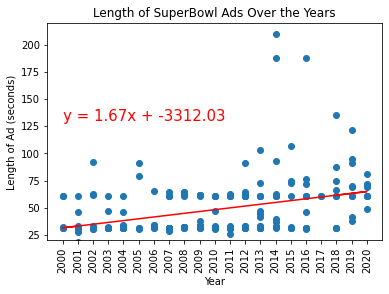

In [25]:
#scatter plot with regression line
plt.scatter(main_df["Year"], main_df["Duration (seconds)"],)

plt.plot(main_df["Year"], regress_value, "r-")
plt.annotate(line_eqn, (2000,130), fontsize= 15,  color = "red")

plt.xlabel("Year")
plt.ylabel("Length of Ad (seconds)")
plt.title("Length of SuperBowl Ads Over the Years")
plt.ylim(20,220)

plt.xticks(np.arange(2000, 2021, step=1), rotation = 90)
print(f"The r-squared is: {rvalue**2}")

plt.show()

### Checking for Outliers

In [16]:
#Finding the quartiles and IQR
quartiles = main_df["Duration (seconds)"].quantile([0.25, 0.5, 0.75])
lower_quar = quartiles[.25]
upper_quar = quartiles[0.75]
iqr = upper_quar - lower_quar

#Creating the bounds
lower_bound = lower_quar - (1.5 * iqr)
upper_bound = upper_quar + (1.5 * iqr)

print(f'The lower quartile of duration of ads is: {lower_quar}.')
print(f'The upper quartile of duration of ads is: {upper_quar}.')
print(f'Values below {round(lower_bound,2)} could be outliers.')
print(f'Values above {round(upper_bound,2)} could be outliers.')

#creating a dataframe with the outliers
outlier_lengths = main_df.loc[(main_df['Duration (seconds)'] < lower_bound) | (main_df['Duration (seconds)'] > upper_bound)]
outlier_lengths

The lower quartile of duration of ads is: 31.0.
The upper quartile of duration of ads is: 61.0.
Values below -14.0 could be outliers.
Values above 106.0 could be outliers.


,Year,Brand,YouTube URL,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Use Sex,View Counts,Duration (seconds)
0,2018,Toyota,https://www.youtube.com/watch?v=zeBZvwYQ-hA,False,False,False,False,False,False,False,189948,135
25,2019,NFL,https://www.youtube.com/watch?v=sl8ooTIMk2w,True,True,False,True,False,False,False,86853,121
77,2016,NFL,https://www.youtube.com/watch?v=9KqekigARfE,False,False,True,True,False,False,False,4950064,188
98,2014,Bud Light,https://www.youtube.com/watch?v=PnOW5qj_R6A,False,True,False,True,False,True,True,150738,210
187,2015,Budweiser,https://www.youtube.com/watch?v=otCxSnu_HXA,False,True,True,False,True,True,False,512154,107
195,2014,Budweiser,https://www.youtube.com/watch?v=gUGGepL5gGU,False,False,True,False,False,True,False,81925,188


### Regression Line without Outliers

In [34]:
#Creating a dataframe without outliers
no_outliers = main_df.drop(labels = [0,25,77,98,187,195], axis=0)

#creating regression values
(outlier_slope, outlier_intercept, outlier_rvalue, outlier_value, outlier_stderr) = st.linregress(
    no_outliers["Year"], no_outliers["Duration (seconds)"])

regress_value = no_outliers["Year"] * outlier_slope + outlier_intercept

#creating the linear regression equation
line_eqn = "y = " + str(round(outlier_slope,2)) + "x + " + str(round(outlier_intercept,2))

The r-squared without the outliers is: 0.12557870957801417


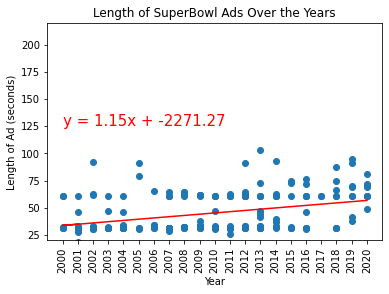

In [35]:
#scatter plot with regression line
plt.scatter(no_outliers["Year"], no_outliers["Duration (seconds)"],)

plt.plot(no_outliers["Year"], regress_value, "r-")
plt.annotate(line_eqn, (2000,125), fontsize= 15,  color = "red")

plt.xlabel("Year")
plt.ylabel("Length of Ad (seconds)")
plt.title("Length of SuperBowl Ads Over the Years")
plt.ylim(20,220)

plt.xticks(np.arange(2000, 2021, step=1), rotation = 90)
print(f"The r-squared without the outliers is: {outlier_rvalue**2}")

plt.show()

## Looking at the Data 10 Years at a Time

In [19]:
#sorting the data in order of year
by_years_df= main_df.sort_values(by=["Year"])


#creating bins
bins = [2000,2010,2020]

group_names = ["2000-2010", "2011-2020"]

by_years_df["Year Grouping"]= pd.cut(by_years_df["Year"], bins, labels = group_names, include_lowest= True)
by_years_df.head()

,Year,Brand,YouTube URL,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Use Sex,View Counts,Duration (seconds),Year Grouping
43,2000,Budweiser,https://www.youtube.com/watch?v=loimTUjV92Q,True,True,False,False,False,False,False,5573,31,2000-2010
67,2000,Bud Light,https://www.youtube.com/watch?v=M3IV93HwSkc,True,True,False,False,True,False,False,6748,31,2000-2010
30,2000,E-Trade,https://www.youtube.com/watch?v=Muyq2kMDFoA,True,True,False,False,False,True,False,21980,32,2000-2010
41,2000,E-Trade,https://www.youtube.com/watch?v=oftjwYmlfoA,True,True,False,False,True,False,False,76350,31,2000-2010
206,2000,Budweiser,https://www.youtube.com/watch?v=GgXsLHifz9k,True,False,False,False,True,True,False,113213,61,2000-2010


### 2000-2010

In [36]:
#creating a data frame for 200-2010 and creating a scatter plot
years_to_2010 = by_years_df.loc[(by_years_df["Year Grouping"] == "2000-2010"), :]

#creating regression values
(slope_2010, intercept_2010, rvalue_2010, pvalue_2010, stderr_2010) = st.linregress(
    years_to_2010["Year"], years_to_2010["Duration (seconds)"])

regress_value = years_to_2010["Year"] * slope_2010 + intercept_2010

#creating the linear regression equation
line_eqn = "y = " + str(round(slope_2010,2)) + "x + " + str(round(intercept_2010,2))

The r-squared with ads from 2000-2010 is: 0.0043732573818562916


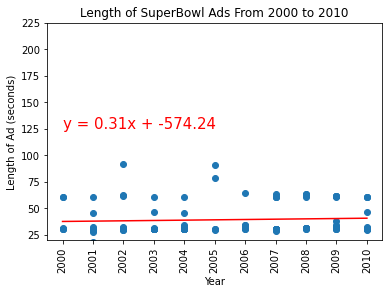

In [37]:
#creating a scatter plot with the regression line
plt.scatter(years_to_2010["Year"], years_to_2010["Duration (seconds)"],)

plt.plot(years_to_2010["Year"], regress_value, "r-")
plt.annotate(line_eqn, (2000,125), fontsize= 15,  color = "red")

plt.xlabel("Year")
plt.ylabel("Length of Ad (seconds)")
plt.title("Length of SuperBowl Ads From 2000 to 2010")
plt.ylim(20,225)

plt.xticks(np.arange(2000, 2011, step=1), rotation = 90)
print(f"The r-squared with ads from 2000-2010 is: {rvalue_2010**2}")

plt.show()

### 2011-2020

In [38]:
#creating a data frame for 200-2010 and creating a scatter plot
years_from_2011 = by_years_df.loc[(by_years_df["Year Grouping"] == "2011-2020"), :]

#creating regression values
(slope_2011, intercept_2011, rvalue_2011, pvalue_2011, stderr_2011) = st.linregress(
    years_from_2011["Year"], years_from_2011["Duration (seconds)"])

regress_value = years_from_2011["Year"] * slope_2011 + intercept_2011

#creating the linear regression equation
line_eqn = "y = " + str(round(slope_2011,2)) + "x + " + str(round(intercept_2011,2))

The r-squared with ads from 2011-2020 is: 0.03077510902881925


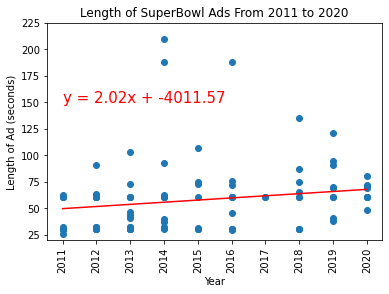

In [39]:
#creating a scatter plot with the regression line
plt.scatter(years_from_2011["Year"], years_from_2011["Duration (seconds)"],)

plt.plot(years_from_2011["Year"], regress_value, "r-")
plt.annotate(line_eqn, (2011,150), fontsize= 15,  color = "red")

plt.xlabel("Year")
plt.ylabel("Length of Ad (seconds)")
plt.title("Length of SuperBowl Ads From 2011 to 2020")
plt.ylim(20,225)

plt.xticks(np.arange(2011, 2021, step=1), rotation = 90)
print(f"The r-squared with ads from 2011-2020 is: {rvalue_2011**2}")

plt.show()